# Sentiment Analysis of tweets

In [3]:
# pip install tweepy
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from string import punctuation
from nltk.corpus import stopwords
import re
import nltk
import numpy as np
import pandas as pd

In [4]:
#nltk.download('stopwords')
#nltk.download('wordnet')

In [5]:
#nltk.download('vader_lexicon')

In [6]:
#Running the python script containing API keys
%run C:\\Users\\korupos\\Documents\\Sentiment\\key.ipynb

In [7]:
auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# The last command prints a message and waits if the rate limit is exceeded
# Twitter allows 15 requests per application per 15 minutes

## input string

In [11]:
dynamic = "USA fuel "
dynamic = dynamic.strip()
dynamic = dynamic.replace(" ", "+")

'USA+fuel'

## scrapping

In [10]:
for tweet in tweepy.Cursor(api.search, q=dynamic, lang='en', tweet_mode="extended").items(10):
    print(tweet.full_text)

RT @TeamAlpha3: What a stuff up in the USA. A population controlled by fear, sprinkled with hate &amp; division. A lethal combination that the…
What a stuff up in the USA. A population controlled by fear, sprinkled with hate &amp; division. A lethal combination that the average IQ cannot comprehend. Illegal immigrants enter the country, fuel supplies are cut, industry is shut down. National &amp; global security is compromised.
RT @PondSagg: gas lines forming up and down east coast on major foreign hack shutting down heart of a USA fuel system

@FBI @CIA @NSAGov co…
RT @GingerGano: Throughout the entire Trump Presidency we had an abundance of fuel and low gas prices along the entire east coast. It liter…
Gas stations run dry and motorists queue for fuel in US, as ransomware attack on pipeline leads to shortages (VIDEOS) — RT USA News https://t.co/3sMNJFuSnD
This is all expected. Nothing surprising about CCP (former USA) pushing CCP’s rare minerals for fuel rather than fossil. https://t

In [31]:
df = pd.DataFrame(columns=['screen_name', 'name', 'date_time', 'location', 'text', 'url'])
for tweet in tweepy.Cursor(api.search, q=dynamic, lang='en', tweet_mode="extended").items(1000):
    df = df.append(pd.Series([tweet.user.screen_name, tweet.user.name, tweet.created_at, tweet.user.location, tweet.full_text, f"https://twitter.com/{tweet.user.screen_name}/status/{tweet.id}"], index=df.columns), ignore_index=True)
df.shape

(1000, 6)

In [32]:
df.head(10)

,screen_name,name,date_time,location,text,url
0,txpeckii,Tom Peck,2021-05-11 14:21:13,,RT @TheGreenKnight: Boldest of blood. Wildest ...,https://twitter.com/txpeckii/status/1392122627...
1,vrajesh_,Vrajesh Sukhadiya,2021-05-11 14:21:13,"Ahmedabad,INDIA",#vaccinationfor18plus #Vaccinateindia \nSometh...,https://twitter.com/vrajesh_/status/1392122626...
2,Anup_Patel,A_P,2021-05-11 14:21:12,"Chapel Hill, NC",RT @JabariDavisNBA: So many incredible scenes ...,https://twitter.com/Anup_Patel/status/13921226...
3,thriddas,Siddarth Raman,2021-05-11 14:21:11,Mumbai,RT @Sahityik_Rajesh: Any Home delivery of Food...,https://twitter.com/thriddas/status/1392122618...
4,ThaRealSamIO,Sam O (he/him) #blm #GetVaxxed,2021-05-11 14:21:11,"McDonough, GA",RT @BudrykZack: They've been trying to get mod...,https://twitter.com/ThaRealSamIO/status/139212...
5,TerryB28937065,Terry Brough #PeaceJusticeSocialism ✊,2021-05-11 14:21:10,St Helens. Merseyside. UK,The UK's voting system is already broken but P...,https://twitter.com/TerryB28937065/status/1392...
6,ayush_patel_001,Ayush patel,2021-05-11 14:21:10,हिन्दुस्थान,@IDF well done Israel 🇮🇱 ❤ 🇮🇳,https://twitter.com/ayush_patel_001/status/139...
7,vapokracker,.:.,2021-05-11 14:21:09,,RT @TheGreenKnight: Boldest of blood. Wildest ...,https://twitter.com/vapokracker/status/1392122...
8,Jorge_LBX,Shadowlord 🎼,2021-05-11 14:21:07,Sanlúcar de Barrameda/Sevilla,RT @A24: Hot summer knights are just around th...,https://twitter.com/Jorge_LBX/status/139212260...
9,AaronSheehan,Aaron Sheehan,2021-05-11 14:21:06,"Springfield, MO","@HannahGraceLong Dev Patel is never late, nor ...",https://twitter.com/AaronSheehan/status/139212...


In [10]:
# for tweet in tweepy.Cursor(api.search, q='sample', count=10,tweet_mode='extended').items():
#     print(f"https://twitter.com/{tweet.user.screen_name}/status/{tweet.id}")

## Tweet Cleaning

In [33]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
tokenized_tweets = [tokenizer.tokenize(t) for t in df.text]

In [34]:
import re
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(["&amp;", "&gt;", "&lt;"])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
clean_text = []
for tweet in tokenized_tweets:
    thandles = []
    thashtags = []
    joined_words = " "
    words = [w.lower() for w in tweet if len(w)>2 and w not in stop_words]
    thandles = [w for w in words if re.search("^@\w+", w)]
    thashtags = [w for w in words if re.search("^#\w+", w)]
    words = [w for w in words if w not in thandles and w not in thashtags]
    words = [lemmatizer.lemmatize(w) for w in words]
    joined_words = joined_words.join(words)
    clean_text.append(joined_words)

In [36]:
df['clean_text'] = clean_text

In [37]:
df[['clean_text','url']].head(10)

,clean_text,url
0,boldest blood wildest heart watch new trailer ...,https://twitter.com/txpeckii/status/1392122627...
1,something happened wrong booking appointment s...,https://twitter.com/vrajesh_/status/1392122626...
2,many incredible scene throughout the wire woul...,https://twitter.com/Anup_Patel/status/13921226...
3,any home delivery food for close friend ahmeda...,https://twitter.com/thriddas/status/1392122618...
4,they've trying get modern audience give shit a...,https://twitter.com/ThaRealSamIO/status/139212...
5,the uk's voting system already broken priti pa...,https://twitter.com/TerryB28937065/status/1392...
6,well done israel,https://twitter.com/ayush_patel_001/status/139...
7,boldest blood wildest heart watch new trailer ...,https://twitter.com/vapokracker/status/1392122...
8,hot summer knight around corner watch new trai...,https://twitter.com/Jorge_LBX/status/139212260...
9,dev patel never late early always arrives prec...,https://twitter.com/AaronSheehan/status/139212...


## Model 1 : GCP NLP API

In [38]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "C:\\Users\\korupos\\Documents\\Sentiment\\senti-311518-1b03476e63cd.json"

In [39]:
# Imports the Google Cloud client library
from google.cloud import language_v1

In [40]:
# Instantiates a client
client = language_v1.LanguageServiceClient()

In [ ]:
senti = []
for i in df['clean_text']:
    text = i
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    try:
        sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    except:
        sentiment.score = 0.000
    senti.append(round(sentiment.score, 2))

In [42]:
df['sentiment_score'] = senti

## Saved to csv

In [43]:
df.to_csv('1000_tweets.csv')

In [44]:
pos = df[df.sentiment_score > 0]
neg = df[df.sentiment_score < 0]
neu = df[df.sentiment_score == 0]

## Results

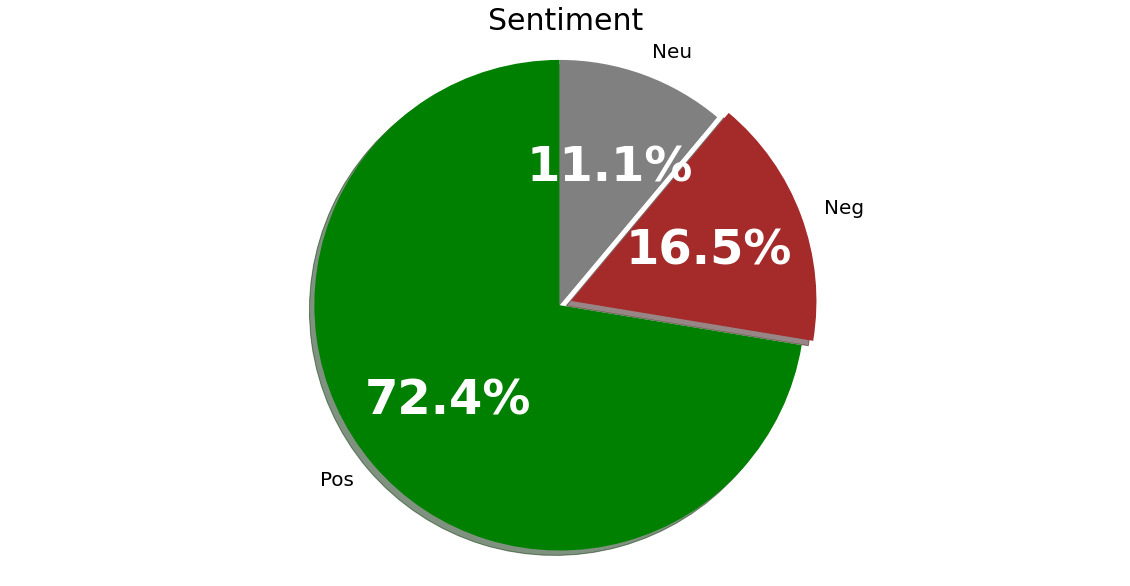

In [45]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pos', 'Neg', 'Neu'
sizes = [len(pos), len(neg), len(neu)]
colors = 'green','brown','grey'

explode = (0, 0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,10))
_, _, autopcts = ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90,
       textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':48})
ax1.set_title('Sentiment', fontdict={'fontsize': 30})

plt.show()

In [46]:
pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
neg.sort_values(by=['sentiment_score'], inplace=True)

<ipython-input-46-17f8801a99d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
<ipython-input-46-17f8801a99d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg.sort_values(by=['sentiment_score'], inplace=True)


In [47]:
pos[['clean_text', 'sentiment_score']].head(10)

,clean_text,sentiment_score
726,this look spectacular dev patel fantastic scre...,0.9
544,this great job something vital london recovery...,0.9
912,beautiful,0.9
574,happy see dev patel winning https://t.co/wgnat...,0.9
922,this look fabulous dev patel directed david lo...,0.9
686,the green knight trailer show dev patel's brea...,0.9
468,something dev patel stunning scenery backdrop ...,0.9
567,good evening mam big fan get,0.9
385,very excited one fav actor dev patel https://t...,0.9
828,crypto currency adoption boost good work keep ...,0.9


In [48]:
neg[['clean_text', 'sentiment_score']].head(10)

,clean_text,sentiment_score
404,crime falling utter bullshit the street never ...,-0.9
95,hypocrisy,-0.9
285,you joking right,-0.8
175,patel seems keen fight small time criminal see...,-0.8
511,patel seems keen fight small time criminal see...,-0.8
600,patel seems keen fight small time criminal see...,-0.8
984,today queen's speech announce yet another immi...,-0.8
148,seized oxygen concentrators business offence w...,-0.8
137,patel seems keen fight small time criminal see...,-0.8
436,patel seems keen fight small time criminal see...,-0.8


## Tweet Distribution

Model 1 : GCP


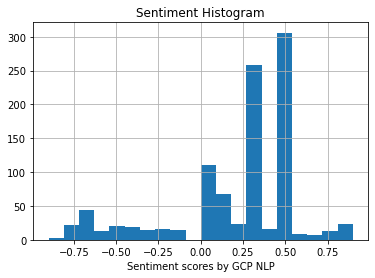

Total Tweets : 1000
Neutral Tweets : 111
Positive Tweets : 724
Negative Tweets : 165


In [49]:
print('Model 1 : GCP')
df['sentiment_score'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment scores by GCP NLP')
plt.show()
print('Total Tweets : ' + str(len(df)))
print('Neutral Tweets : ' + str((df['sentiment_score'] == 0).sum()))
print('Positive Tweets : ' + str((df['sentiment_score'] > 0).sum()))
print('Negative Tweets : ' + str((df['sentiment_score'] < 0).sum()))

# Ignore below

## Cleaning of tweet corpus

In [25]:
# blobs = []                #This list holds the cleaned tweets

# for i in range(len(df)):
#     tweet = df['text'][i]
#     tweet = tweet.strip(punctuation).lower()
#     tweet = re.sub(r'http\S+', ' ', tweet)
#     tweet = re.sub(r'@\S+', ' ', tweet)
#     tweet = re.sub(r'#', '', tweet)
#     tweet = re.sub(r'[^a-z]+', ' ', tweet)
#     tweet = re.sub(r'rt', ' ', tweet)
    
#     blobs.append(tweet)

## Model 2 : TextBlob

In [26]:
# polarity = []
# #subjectivity = []

# for i in range(len(blobs)):
#     xyz = TextBlob(blobs[i])
#     polarity.append(xyz.sentiment.polarity)
# #    subjectivity.append(xyz.sentiment.subjectivity)

In [27]:
# df['TextBlob_score'] = polarity
# #df['subjectivity'] = subjectivity

In [29]:
# df['TextBlob_score'].mean()

0.07414199775128084

## Model 3 : Vader

In [30]:
# analyzer = SentimentIntensityAnalyzer()
# sentiment = {}
# pol = [0]*len(df)
    
# for i in range(len(df)):
#     tweet = df['text'][i]
#     sentiment[i] = analyzer.polarity_scores(tweet)
#     pol[i] = sentiment[i]['compound']
# df['Vader_score'] = pol

## Results

Model 2 : TextBlob


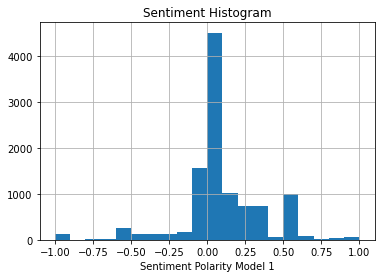

Total Tweets : 10824
Neutral Tweets : 4115
Positive Tweets : 4177
Negative Tweets : 2532


In [35]:
# print('Model 2 : TextBlob')
# df['TextBlob_score'].hist(bins=20)
# plt.title('Sentiment Histogram')
# plt.xlabel('Sentiment Polarity by TextBlob')
# plt.show()
# print('Total Tweets : ' + str(len(df)))
# print('Neutral Tweets : ' + str((df['TextBlob_score'] == 0).sum()))
# print('Positive Tweets : ' + str((df['TextBlob_score'] > 0).sum()))
# print('Negative Tweets : ' + str((df['TextBlob_score'] < 0).sum()))

Model 3 : Vader


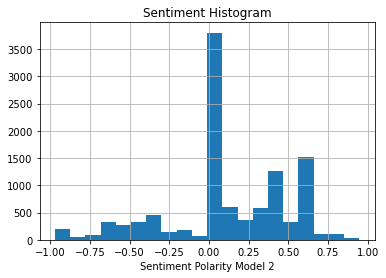

Total Tweets : 10824
Neutral Tweets : 3645
Positive Tweets : 5045
Negative Tweets : 2134


In [36]:
# print('Model 3 : Vader')
# df['Vader_score'].hist(bins=20)
# plt.title('Sentiment Histogram')
# plt.xlabel('Sentiment Polarity by Vader')
# plt.show()
# print('Total Tweets : ' + str(len(df)))
# print('Neutral Tweets : ' + str((df['Vader_score'] == 0).sum()))
# print('Positive Tweets : ' + str((df['Vader_score'] > 0).sum()))
# print('Negative Tweets : ' + str((df['Vader_score'] < 0).sum()))

Model 1 : GCP


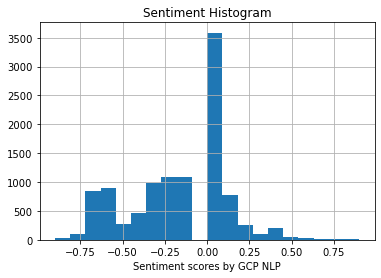

Total Tweets : 10824
Neutral Tweets : 3587
Positive Tweets : 1438
Negative Tweets : 5799


In [37]:
print('Model 1 : GCP')
df['sentiment_score'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment scores by GCP NLP')
plt.show()
print('Total Tweets : ' + str(len(df)))
print('Neutral Tweets : ' + str((df['sentiment_score'] == 0).sum()))
print('Positive Tweets : ' + str((df['sentiment_score'] > 0).sum()))
print('Negative Tweets : ' + str((df['sentiment_score'] < 0).sum()))

In [34]:
# df.to_csv('analysis.csv',index=False,encoding='utf-8')

## Sample neutral

In [134]:
#sentiment = analyzer.polarity_scores('do you think florida should open eligibility for the covid vaccine to all adults')
#sentiment

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Sample negative

In [128]:
#sentiment = analyzer.polarity_scores('wtf i live in florida and still cannot get the vaccine')
#sentiment

{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.5859}

## Sample positive

In [135]:
#sentiment = analyzer.polarity_scores('i am happy to say as a year old resident of florida i received my first moderna vaccine this morning ')
#sentiment

{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}